# Задача классификаци: по имеющимся данным определить страну биллионера

### Датасет: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

In [69]:
import pandas as pd

In [70]:
data = pd.read_csv('Billionaires Statistics Dataset.csv')
data

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [71]:
data.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

# Предобработка

- Наличие выбросов и пустых полей (пустые поля: осталось 3 колонки - текстовые и категориальные)

- Удаление колонок

- Зависимость между колонками

- Поиск дубликатов

- Изменение типов колонок (при необходимости)

- Нормализация

- Преобразование категориальных и текстовых признаков


## ----------------------------------------------
## Наличие пустых полей
## ----------------------------------------------

In [72]:
pd.isnull(data).sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

### Удаление колонок с большим количеством пропусков

In [73]:
data = data.drop(columns = ['organization', 'title', 'state', 'residenceStateRegion'])

In [74]:
pd.isnull(data).sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                            65
country                                        38
city                                           72
source                                          0
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
status                                          0
gender                                          0
birthDate                                      76
lastName                                        0
firstName                                       3
date                                            0
birthYear                                      76
birthMonth                                     76
birthDay                                       76


In [75]:
data[['birthDate', 'birthYear', 'birthMonth', 'birthDay']]

,birthDate,birthYear,birthMonth,birthDay
0,3/5/1949 0:00,1949.0,3.0,5.0
1,6/28/1971 0:00,1971.0,6.0,28.0
2,1/12/1964 0:00,1964.0,1.0,12.0
3,8/17/1944 0:00,1944.0,8.0,17.0
4,8/30/1930 0:00,1930.0,8.0,30.0
...,...,...,...,...
2635,12/14/1971 0:00,1971.0,12.0,14.0
2636,3/10/1943 0:00,1943.0,3.0,10.0
2637,12/18/1962 0:00,1962.0,12.0,18.0
2638,8/21/1951 0:00,1951.0,8.0,21.0


### birthDate не нужен, т.к. данные уже есть в 3 других колонках

### изменить тип c float на int  

In [76]:
data = data.drop(columns = 'birthDate')
data[['birthYear', 'birthMonth', 'birthDay']].astype("Int32")

,birthYear,birthMonth,birthDay
0,1949,3,5
1,1971,6,28
2,1964,1,12
3,1944,8,17
4,1930,8,30
...,...,...,...
2635,1971,12,14
2636,1943,3,10
2637,1962,12,18
2638,1951,8,21


### Заполнили пропуски медианой у числовых значений

In [77]:
data = data.fillna(data.median())

/tmp/ipykernel_3638/1553445849.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


In [10]:
data.isnull().sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                             0
country                                        38
city                                           72
source                                          0
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
status                                          0
gender                                          0
lastName                                        0
firstName                                       3
date                                            0
birthYear                                       0
birthMonth                                      0
birthDay                                        0
cpi_country                                     0


### Преобразование колонки с $ в число

In [78]:
import re

def convertBillionFromStrToInt(strBillion):
    numbers = re.findall(r'\b\d+\b', str(strBillion))
    billion = ''.join(numbers)
    return 0 if (billion == '') else int(billion)

In [79]:
data['gdp_country'] = data['gdp_country'].apply(lambda x : convertBillionFromStrToInt(x))
data['gdp_country']

0        2715518274227
1       21427700000000
2       21427700000000
3       21427700000000
4       21427700000000
             ...      
2635    19910000000000
2636    21427700000000
2637    19910000000000
2638    19910000000000
2639      376795508680
Name: gdp_country, Length: 2640, dtype: int64

In [80]:
data = data.fillna(data.median())
data.isnull().sum()

/tmp/ipykernel_3638/541291939.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


rank                                           0
finalWorth                                     0
category                                       0
personName                                     0
age                                            0
country                                       38
city                                          72
source                                         0
industries                                     0
countryOfCitizenship                           0
selfMade                                       0
status                                         0
gender                                         0
lastName                                       0
firstName                                      3
date                                           0
birthYear                                      0
birthMonth                                     0
birthDay                                       0
cpi_country                                    0
cpi_change_country  

## ----------------------------------------------
## Проверка на выбросы
## ----------------------------------------------

### rank

<Axes: >

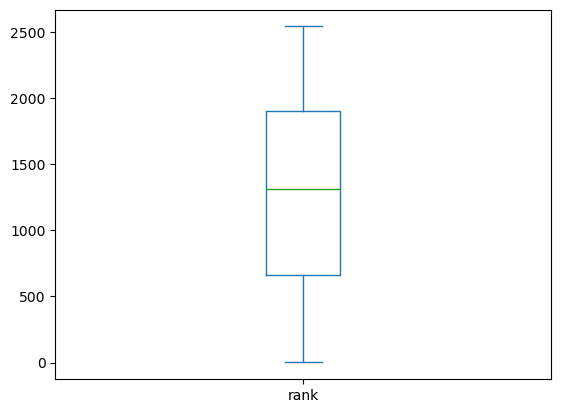

In [81]:
data['rank'].plot(kind = 'box')

### finalWorth

<Axes: >

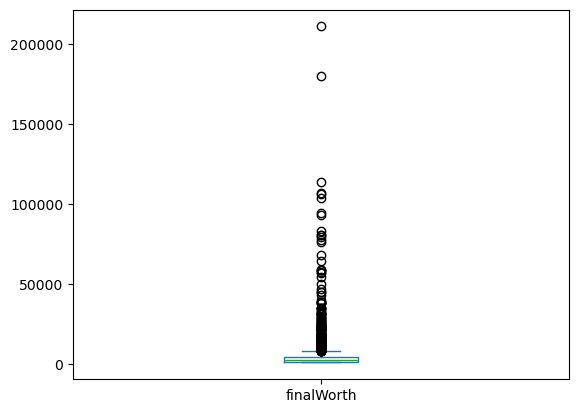

In [82]:
data['finalWorth'].plot(kind = 'box') # удалить 2 выброса - самых верхних

### age

<Axes: >

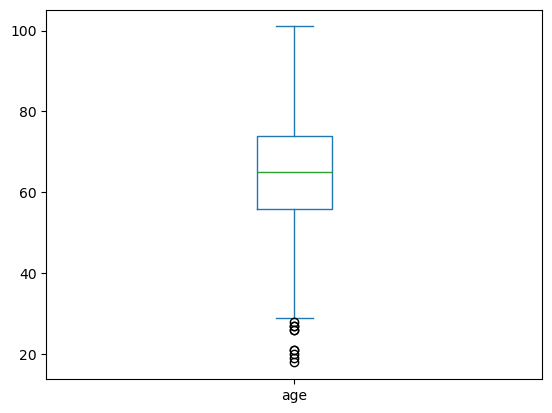

In [83]:
data['age'].plot(kind = 'box')

<Axes: >

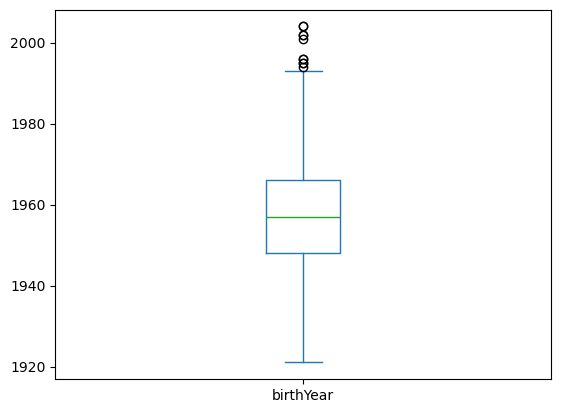

In [84]:
data['birthYear'].plot(kind = 'box')

<Axes: >

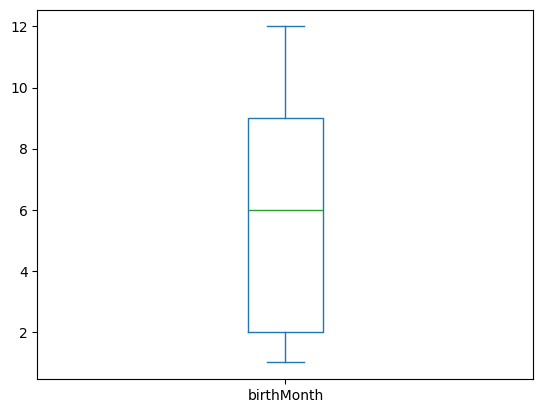

In [85]:
data['birthMonth'].plot(kind = 'box')

<Axes: >

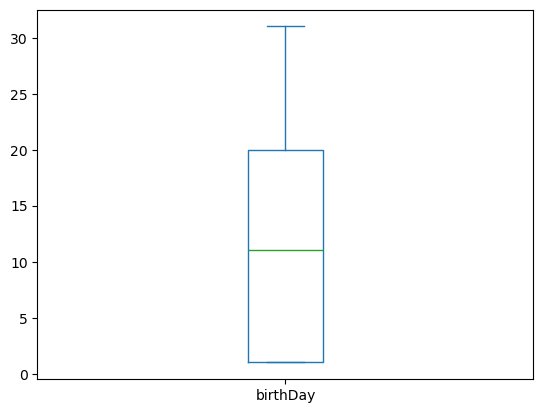

In [86]:
data['birthDay'].plot(kind = 'box')

<Axes: >

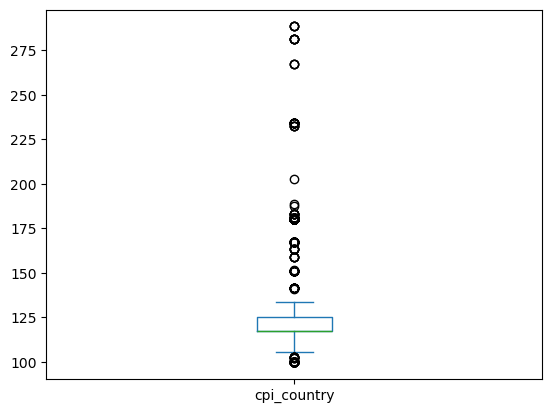

In [87]:
data['cpi_country'].plot(kind = 'box')  # удалить выбросы

<Axes: >

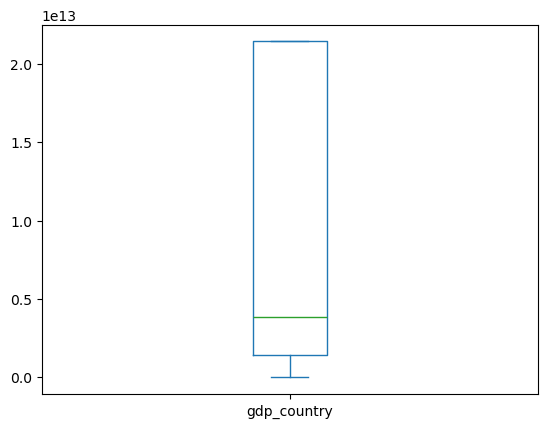

In [88]:
data['gdp_country'].plot(kind = 'box')

<Axes: >

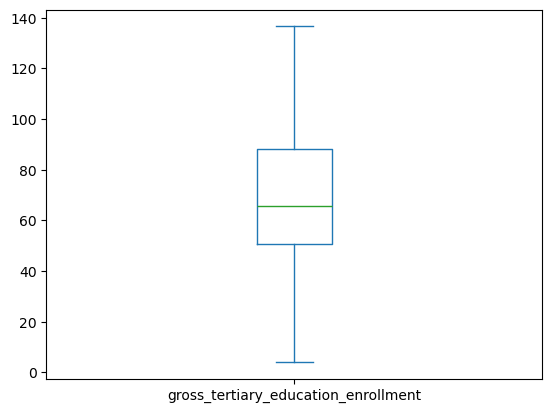

In [89]:
data['gross_tertiary_education_enrollment'].plot(kind = 'box')

<Axes: >

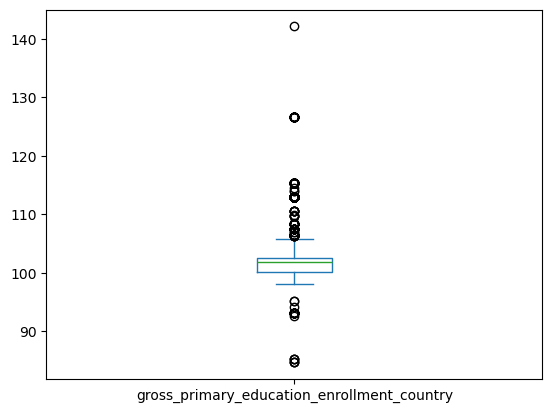

In [43]:
data['gross_primary_education_enrollment_country'].plot(kind = 'box')

<Axes: >

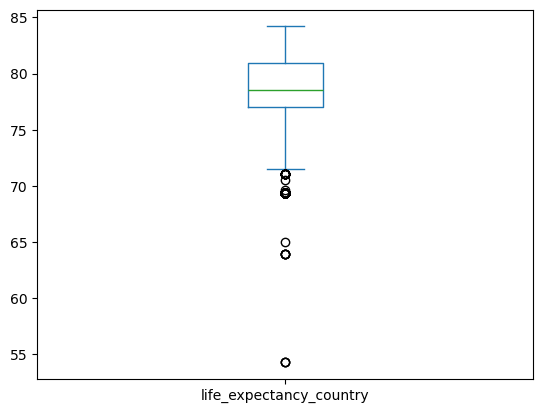

In [44]:
data['life_expectancy_country'].plot(kind = 'box')

<Axes: >

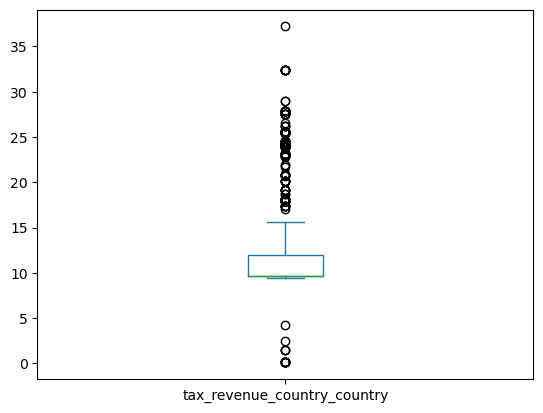

In [45]:
data['tax_revenue_country_country'].plot(kind = 'box')

<Axes: >

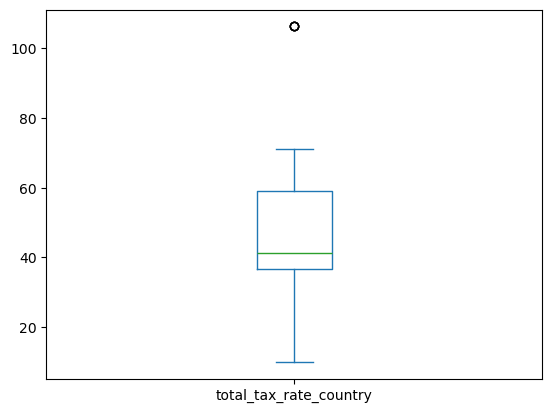

In [46]:
data['total_tax_rate_country'].plot(kind = 'box')

<Axes: >

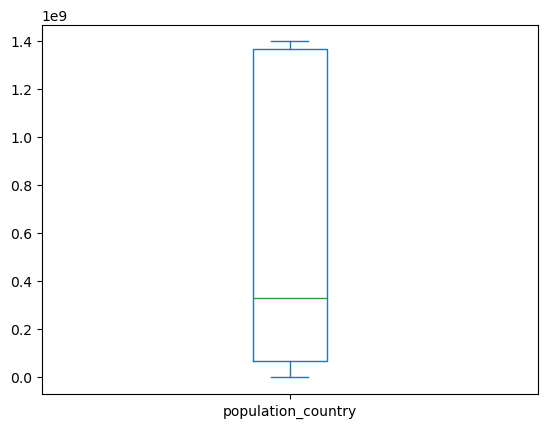

In [47]:
data['population_country'].plot(kind = 'box')

<Axes: >

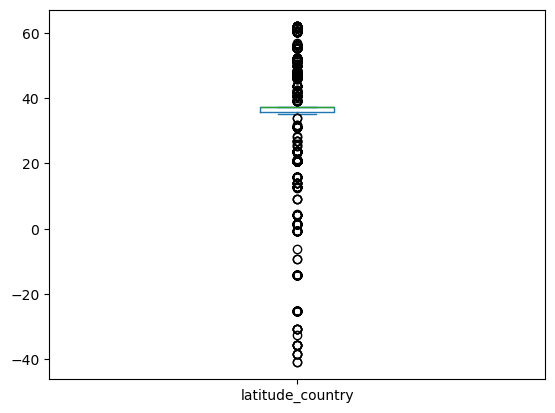

In [90]:
data['latitude_country'].plot(kind = 'box')

<Axes: >

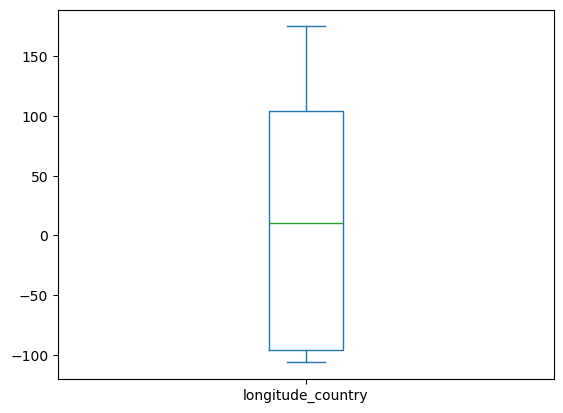

In [49]:
data['longitude_country'].plot(kind = 'box')

## -----------------------------------------
## Удаление колонок
## -----------------------------------------

In [91]:
# Т.к. category и industries одинаковые
data = data.drop(columns = 'industries')
data

,rank,finalWorth,category,personName,age,country,city,source,countryOfCitizenship,selfMade,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,France,False,...,1.1,2715518274227,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",United States,True,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,United States,True,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,United States,True,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,United States,True,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,China,True,...,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,United States,False,...,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,China,True,...,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,China,True,...,2.9,19910000000000,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


### Удалить строки со значением 'city' и 'country', равное nan

In [92]:
data = data.dropna(subset = 'city')

In [93]:
data.isna().sum()
# заполнить nan у города медианой при кодировании категориальных значений

rank                                          0
finalWorth                                    0
category                                      0
personName                                    0
age                                           0
country                                       0
city                                          0
source                                        0
countryOfCitizenship                          0
selfMade                                      0
status                                        0
gender                                        0
lastName                                      0
firstName                                     3
date                                          0
birthYear                                     0
birthMonth                                    0
birthDay                                      0
cpi_country                                   0
cpi_change_country                            0
gdp_country                             

### Удаление выбросов

In [94]:
def clearOutliers(column):
    global data
    first_quartile = data[column].describe()['25%']
    third_quartile = data[column].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile

    # Remove outliers
    data = data[(data[column] > (first_quartile - 3 * iqr)) &
            (data[column] < (third_quartile + 3 * iqr))]

In [95]:
outlierColumns = ['finalWorth', 'age', 'birthYear', 'cpi_country', 'gross_primary_education_enrollment_country',
                    'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'latitude_country']

for column in outlierColumns:
    clearOutliers(column=column)

<Axes: >

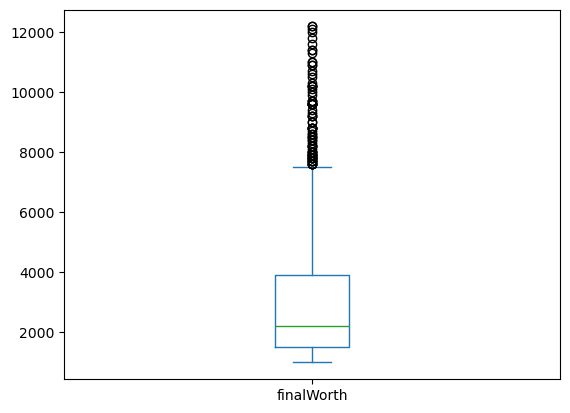

In [96]:
data['finalWorth'].plot(kind = 'box')

<Axes: >

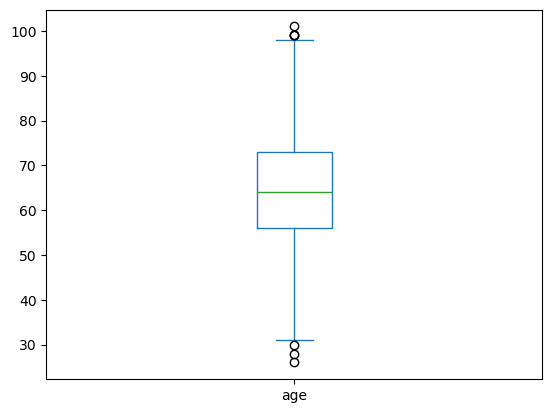

In [97]:
data['age'].plot(kind = 'box')

<Axes: >

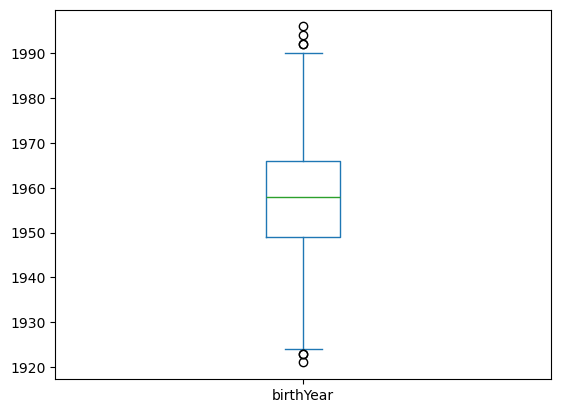

In [98]:
data['birthYear'].plot(kind = 'box')

<Axes: >

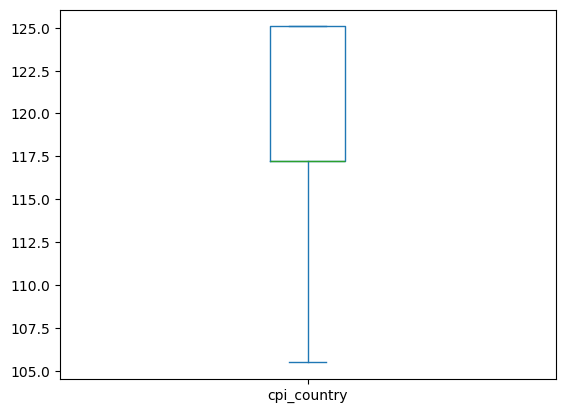

In [99]:
data['cpi_country'].plot(kind = 'box')

<Axes: >

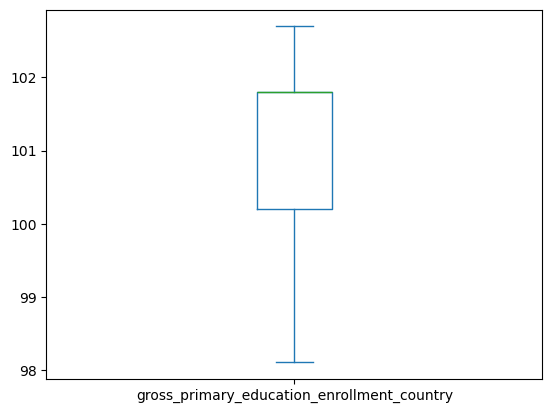

In [100]:
data['gross_primary_education_enrollment_country'].plot(kind = 'box')

<Axes: >

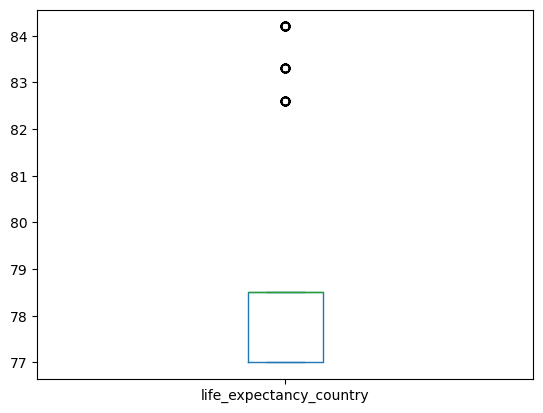

In [101]:
data['life_expectancy_country'].plot(kind = 'box')

<Axes: >

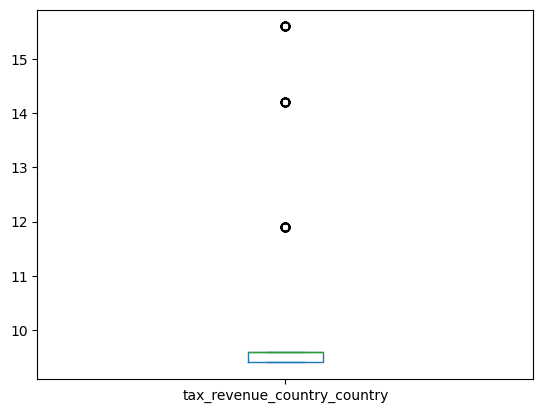

In [102]:
data['tax_revenue_country_country'].plot(kind = 'box')

<Axes: >

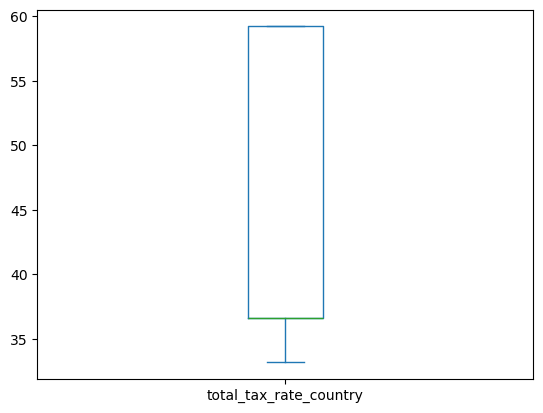

In [103]:
data['total_tax_rate_country'].plot(kind = 'box')

<Axes: >

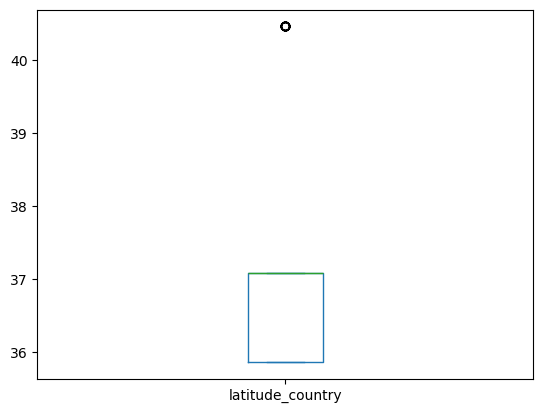

In [104]:
data['latitude_country'].plot(kind = 'box')

In [105]:
data.to_csv("after_clear_outliers.csv")